In [12]:
  import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
x_train=x_train/255.0
x_train.shape
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

In [4]:
cifar10_model=tf.keras.models.Sequential()

cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(tf.keras.layers.Flatten())
# cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))



In [5]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["acc"])

In [6]:
from keras.models import Model
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))
    
    def display_activation(self, activations, col_size, row_size, act_index): 
        activation = activations[act_index]
        activation_index=0
        fig, ax = plt.subplots(row_size, col_size, figsize=(row_size,col_size*1.5))
        for row in range(0,row_size):
            for col in range(0,col_size):
                ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
                activation_index += 1
        plt.show()
  
    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))
        layer_outputs = [layer.output for layer in cifar10_model.layers]
        activation_model = Model(inputs=cifar10_model.input, outputs=layer_outputs)
        activations = activation_model.predict(x_train[96].reshape(1, 32, 32, 3))
        self.display_activation(activations, 4, 8, 1)

Epoch 1/15
Start epoch 0 of training; got log keys: []
1563/1563 [==============================] - 13s 4ms/step - loss: 1.6091 - acc: 0.4084
End epoch 0 of training; got log keys: ['loss', 'acc']


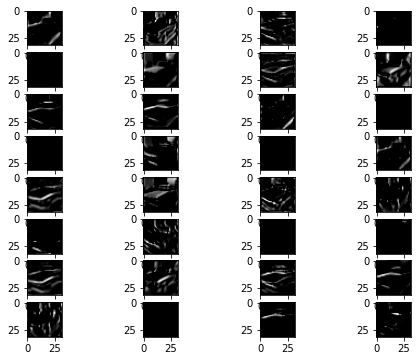

Epoch 2/15
Start epoch 1 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9451 - acc: 0.6645
End epoch 1 of training; got log keys: ['loss', 'acc']


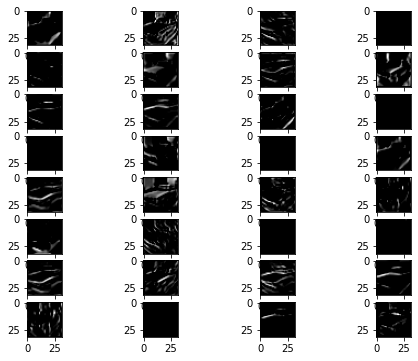

Epoch 3/15
Start epoch 2 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7547 - acc: 0.7357
End epoch 2 of training; got log keys: ['loss', 'acc']


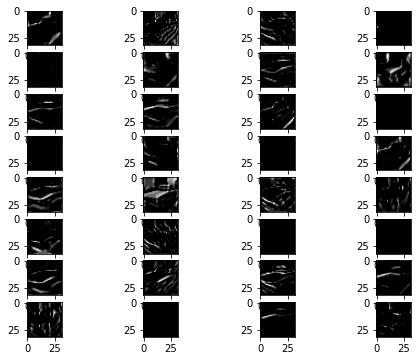

Epoch 4/15
Start epoch 3 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6322 - acc: 0.7785
End epoch 3 of training; got log keys: ['loss', 'acc']


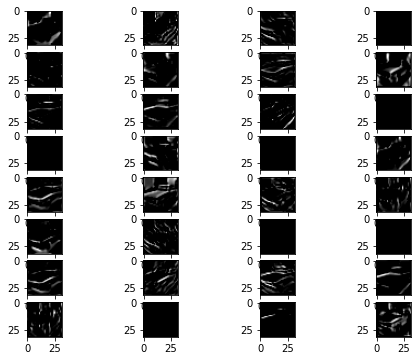

Epoch 5/15
Start epoch 4 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5196 - acc: 0.8176
End epoch 4 of training; got log keys: ['loss', 'acc']


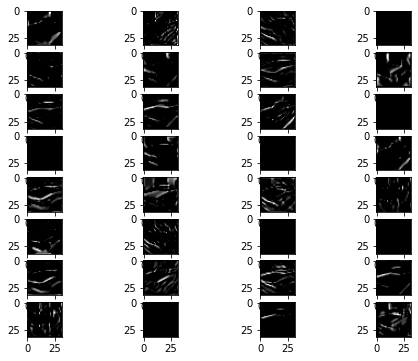

Epoch 6/15
Start epoch 5 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4310 - acc: 0.8498
End epoch 5 of training; got log keys: ['loss', 'acc']


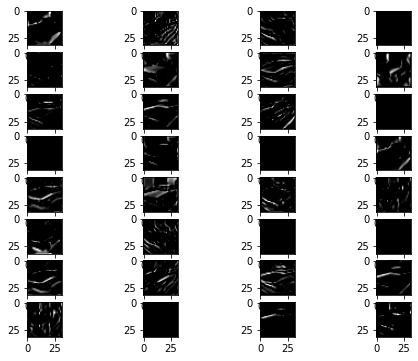

Epoch 7/15
Start epoch 6 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3550 - acc: 0.8765
End epoch 6 of training; got log keys: ['loss', 'acc']


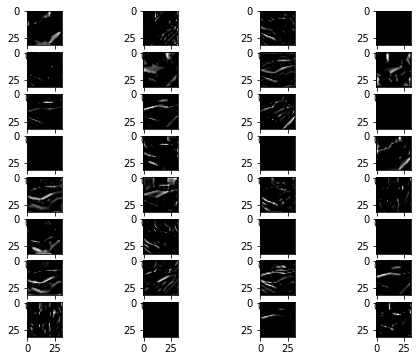

Epoch 8/15
Start epoch 7 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2841 - acc: 0.8994
End epoch 7 of training; got log keys: ['loss', 'acc']


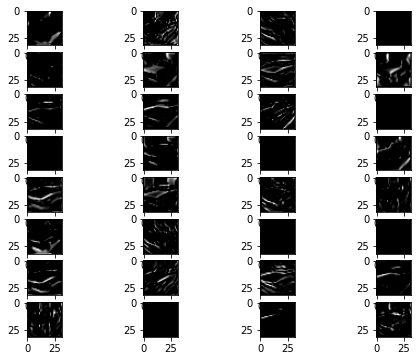

Epoch 9/15
Start epoch 8 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2274 - acc: 0.9199
End epoch 8 of training; got log keys: ['loss', 'acc']


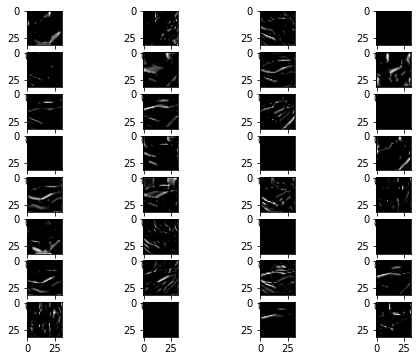

Epoch 10/15
Start epoch 9 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1927 - acc: 0.9316
End epoch 9 of training; got log keys: ['loss', 'acc']


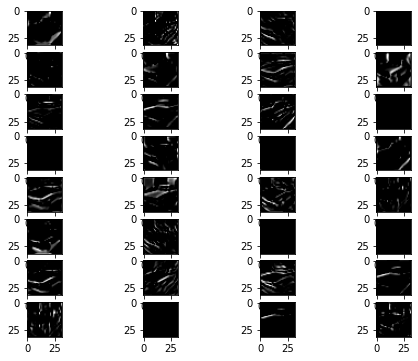

Epoch 11/15
Start epoch 10 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1532 - acc: 0.9461
End epoch 10 of training; got log keys: ['loss', 'acc']


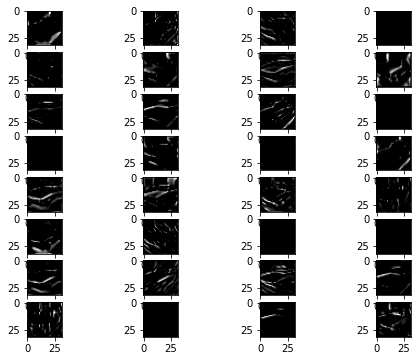

Epoch 12/15
Start epoch 11 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1342 - acc: 0.9537
End epoch 11 of training; got log keys: ['loss', 'acc']


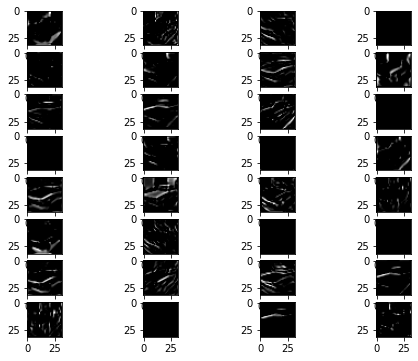

Epoch 13/15
Start epoch 12 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1242 - acc: 0.9567
End epoch 12 of training; got log keys: ['loss', 'acc']


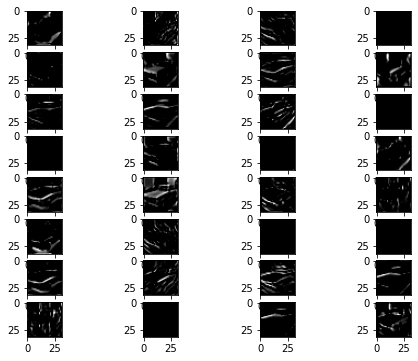

Epoch 14/15
Start epoch 13 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1112 - acc: 0.9617
End epoch 13 of training; got log keys: ['loss', 'acc']


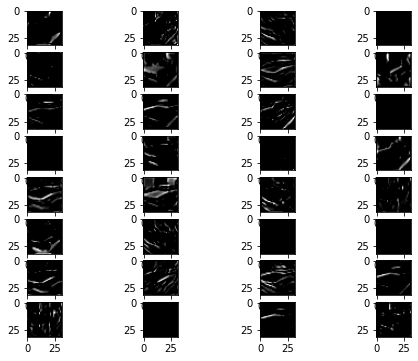

Epoch 15/15
Start epoch 14 of training; got log keys: []
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0972 - acc: 0.9663
End epoch 14 of training; got log keys: ['loss', 'acc']


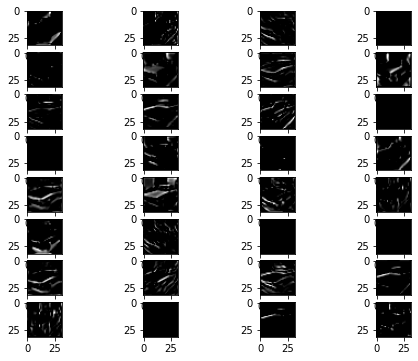

In [7]:
cifar10_model.fit(x_train,y_train,epochs=15, callbacks=[CustomCallback()])

In [17]:
result = cifar10_model.predict(x_train)

In [20]:
print(np.argmax(result, axis=1))
print(y_train)
print(np.sum(np.argmax(result, axis=1) == y_train))

[6 9 9 ... 9 1 1]
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
250000000


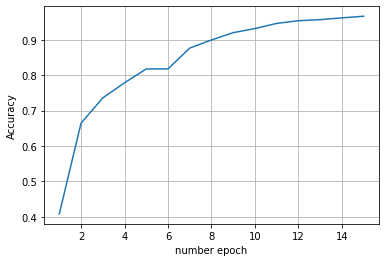

In [25]:
plt.plot(np.arange(1,len(acc)+1), acc)
plt.ylabel('Accuracy')
plt.xlabel("number epoch")
plt.grid(True)
plt.show()

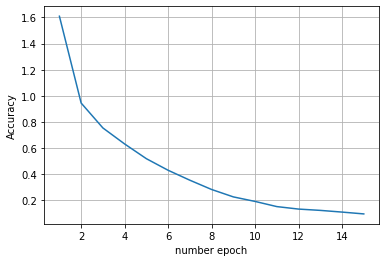

In [26]:
plt.plot(np.arange(1,len(loss)+1), loss)
plt.ylabel('Accuracy')
plt.xlabel("number epoch")
plt.grid(True)
plt.show()